<a href="https://colab.research.google.com/github/4060E009/AI_and_security/blob/master/2012%E8%81%AF%E9%82%A6%E9%81%B8%E8%88%89%E5%A7%94%E5%93%A1%E6%9C%83%E8%B3%87%E6%96%99%E5%BA%AB2020_11_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** 2012 Federal Election Commission Database**

In [30]:
!wget https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/fec/P00000001-ALL.csv

--2020-11-04 02:44:10--  https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/fec/P00000001-ALL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157871393 (151M) [text/plain]
Saving to: ‘P00000001-ALL.csv’

P00000001-ALL.csv   100%[===================>] 150.56M   112MB/s    in 1.3s    

2020-11-04 02:44:11 (112 MB/s) - ‘P00000001-ALL.csv’ saved [157871393/157871393]



In [31]:
import numpy as np
import pandas as pd

In [32]:
pd.options.display.max_rows = 10

In [33]:
fec = pd.read_csv('P00000001-ALL.csv',low_memory=False )

In [34]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

**拿出一份記錄來看是什麽樣子**

In [35]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

**使用unique得到所有候選人名單**

In [36]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [37]:
unique_cands[2]

'Obama, Barack'

**一種標記政黨的方法是使用dict**

In [38]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican', 
           'Gingrich, Newt': 'Republican', 
           'Huntsman, Jon': 'Republican', 
           'Johnson, Gary Earl': 'Republican', 
           'McCotter, Thaddeus G': 'Republican', 
           'Obama, Barack': 'Democrat', 
           'Paul, Ron': 'Republican', 
           'Pawlenty, Timothy': 'Republican', 
           'Perry, Rick': 'Republican', 
           "Roemer, Charles E. 'Buddy' III": 'Republican', 
           'Romney, Mitt': 'Republican', 
           'Santorum, Rick': 'Republican'}

In [39]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

**用map方法，把這個映射應用到Series對象上，我們可以用候選者名字得到一個政黨的數組**

In [40]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [41]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [42]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

**這個數據集中包含捐款和退款（退款表示把捐贈的錢退還給捐助者，用負數表示）**

In [43]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

**為了簡化之後的分析過程，這里我們只取捐款的數據，不考慮退款的數據**

In [44]:
fec = fec[fec.contb_receipt_amt > 0]

**因為Barack Obama和Mitt Romney是兩個最主要的候選者，所以這里我們單獨準備一個子集來包含二人的數據**

In [45]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

# **Donation Statistics by Occupation and Employer**

**按職業計算捐贈總額**

In [46]:
fec.contbr_occupation.value_counts()[:10]


RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

**可以看到有些職業是同一種工作類型，指代的是同一個東西。下面用一小段代碼來清理一下，把一些職業映射為另一種；注意dict.get方法，它會無視沒有映射關系的職業**

In [47]:
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED', 
    'C.E.O.': 'CEO' 
}

# If no mapping provided, return x 
f = lambda x: occ_mapping.get(x, x) 
fec.contbr_occupation = fec.contbr_occupation.map(f)

SyntaxError: ignored

pandas會在遇到Chained assignment的情況時，跳出這個SettingWithCopyWarning。Chained assignment指的是data[data.bidder == 'parakeet2004']['bidderrate'] = 100這樣的情況，即把兩個索引操作連在一起。

data[data.bidder == 'parakeet2004']

['bidderrate'] = 100

這兩個連續操作是分別獨立執行的，一個結束後，另一個才開始。第一個操作是一個訪問（access）方法，這個方法會返回一個新的DataFrame。而第二個方法是一個賦值（assignment）方法，這個方法是作用在新產生的DataFrame上，所以這里的100是賦給了新的DataFrame，原始的DataFrame並沒有被更改。所以為了防止這樣的情況出現，pandas會发出SettingWithCopyWarning，讓我們檢查一下有沒有出錯。

那就檢查一下唄，下面輸出fec.contbr_occupation，发現映射關系被正常執行了，所以這里的warning我們可以忽略

In [48]:
fec.contbr_occupation

0                                         RETIRED
1                                         RETIRED
2                           INFORMATION REQUESTED
3                                         RETIRED
4                                         RETIRED
                            ...                  
1001726    INFORMATION REQUESTED PER BEST EFFORTS
1001727                            BUSINESS OWNER
1001728    INFORMATION REQUESTED PER BEST EFFORTS
1001729              LONGWALL MAINTENANCE FOREMAN
1001730    INFORMATION REQUESTED PER BEST EFFORTS
Name: contbr_occupation, Length: 991475, dtype: object

**同样的映射处理**

In [50]:
emp_mapping = { 
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED', 
    'SELF' : 'SELF-EMPLOYED', 
    'SELF EMPLOYED' : 'SELF-EMPLOYED', 
}

# If no mapping provided, return x 
f = lambda x: emp_mapping.get(x, x) 
fec.contbr_employer = fec.contbr_employer.map(f)

In [51]:
fec.contbr_employer

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                                  NONE
4                                  NONE
                       ...             
1001726                    NOT PROVIDED
1001727    DUFFY EQUIPMENT COMPANY INC.
1001728                    NOT PROVIDED
1001729                        T.A.C.C.
1001730                    NOT PROVIDED
Name: contbr_employer, Length: 991475, dtype: object

**我們可以用pivot_table，按政黨和職業對數據進行聚合，然後過濾下得到捐贈額大於兩百萬美元以上的職業**

In [53]:
by_occupation = fec.pivot_table('contb_receipt_amt', 
                                index='contbr_occupation',
                                columns='party',
                                aggfunc='sum')

In [54]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


**畫出柱狀圖，barh表示水平柱狀圖**

In [55]:
import seaborn as sns
%matplotlib inline

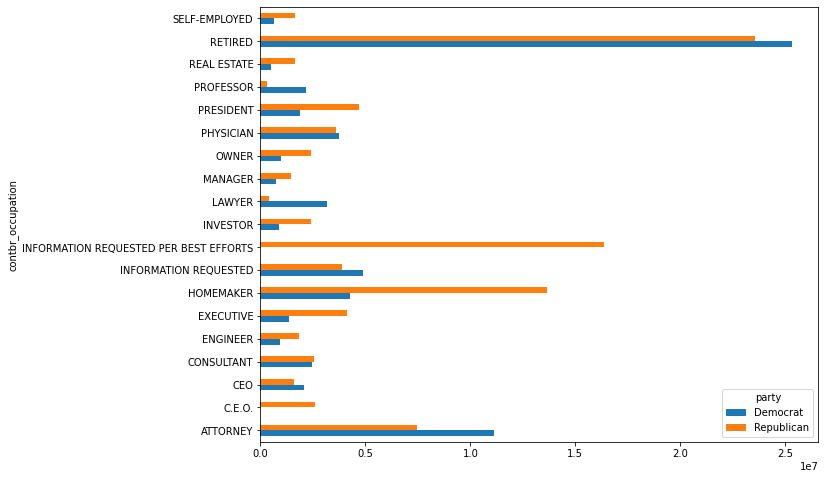

In [56]:
over_2mm.plot(kind='barh', figsize=(10, 8))

**我們可以能對那些捐款給Obama和Romney的頂級捐助者職業，或頂級捐助公司感興趣。想要得到這些信息的話，可以按候選者名字進行分組，然後使用top方法的一個變形**

In [57]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

**按職業和雇主聚合**

In [58]:
grouped = fec_mrbo.groupby('cand_nm')
grouped

In [59]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [60]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

# **Bucketing Donation Amounts**

**一個分析這種數據的有用方法是使用cut函數，把捐贈額去中心化，按捐贈額大小分為多個桶**

In [61]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])

In [62]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] <
                                  (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

我們可以按二人的名字和箱標簽（bin **label）分組，得到按不同捐贈額的直方圖**

In [63]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


**這份數據說明Obama收到的小額捐助是遠超Romney的。我們也可以對每一個箱進行歸一化，然後得到百分比數據**

In [64]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [65]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


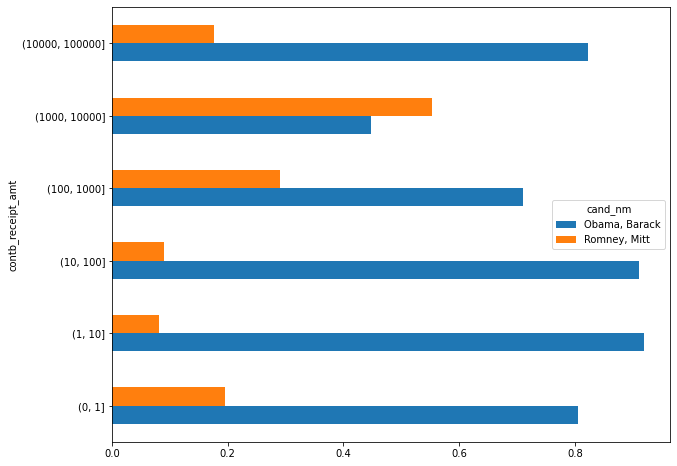

In [66]:
normed_sums[:-2].plot(kind='barh', figsize=(10, 8))

# **Donation Statistics by State**

**按州劃分也是一個比較常見的方法**

In [67]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [68]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [69]:
totals = totals[totals.sum(1) > 100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
...,...,...
WA,4250933.16,1341521.56
WI,1130155.46,270316.32
WV,169154.47,126725.12


**還可以得到每個州，兩個候選人獲得金額的百分比**

In [70]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
